# Threshold Adjustment

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## (1) Loading the Dataset

ℹ Each observation represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

In [30]:
data = pd.read_csv("../data/metrics/ML_Player_performance.csv")
data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [31]:
data.shape

(1328, 20)

In [32]:
data.describe()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.386295,17.633208,6.810843,2.631099,5.895407,44.113855,0.249774,0.785994,19.305572,1.300678,1.824925,70.397741,1.005422,2.017696,3.022440,1.557455,0.620105,0.365964,1.195482,0.621988
std,17.477617,8.313257,4.354063,1.682188,3.590914,6.120329,0.384731,1.064173,16.028682,0.986728,1.324292,10.488180,0.775414,1.356103,2.051487,1.473649,0.410555,0.428648,0.724485,0.485073
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.175000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.300000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.625000,2.300000,77.600000,1.400000,2.600000,3.925000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   games played         1328 non-null   int64  
 1   minutes played       1328 non-null   float64
 2   points per game      1328 non-null   float64
 3   field goals made     1328 non-null   float64
 4   field goal attempts  1328 non-null   float64
 5   field goal percent   1328 non-null   float64
 6   3 point made         1328 non-null   float64
 7   3 point attempt      1328 non-null   float64
 8   3 point %            1328 non-null   float64
 9   free throw made      1328 non-null   float64
 10  free throw attempts  1328 non-null   float64
 11  free throw %         1328 non-null   float64
 12  offensive rebounds   1328 non-null   float64
 13  defensive rebounds   1328 non-null   float64
 14  rebounds             1328 non-null   float64
 15  assists              1328 non-null   f

## (2) Preprocessing

In [34]:
scaler = RobustScaler()
X = data.drop(columns=['target_5y'])
y = data.target_5y
X_scaled = scaler.fit_transform(X)

## (3) Base Modeling

The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

In [35]:
LR_model = LogisticRegression(max_iter=1000)
cv_results = cross_validate(LR_model, X_scaled, y, cv=10,
                            scoring=['accuracy', 'precision', 'recall', 'f1'])

base_score = cv_results['test_precision'].mean()
print(cv_results['test_accuracy'].mean())
print(cv_results['test_recall'].mean())
print(base_score)
print(cv_results['test_f1'].mean())

0.7063112326270221
0.8207170143990596
0.737761327524343
0.7759246018721552


## (4) Threshold adjustment

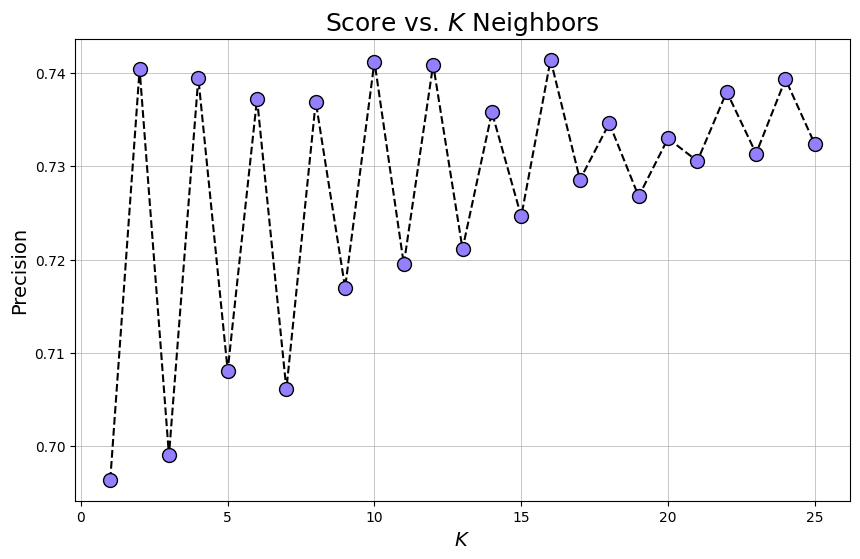

In [36]:
scores = []
neighbors = []

for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model, X_scaled, y, cv=10, scoring=['precision'])
    neighbors.append(k)
    scores.append(score['test_precision'].mean())

# Plot the evolution of the score below
with plt.style.context('fast'):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.plot(neighbors, scores, color='black', linestyle='dashed', marker='o', markerfacecolor='#947FFF', markersize=10)
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('Precision', fontsize = 14)
    ax.grid(axis="x", linewidth=0.5)
    ax.grid(axis="y", linewidth=0.5)

    # best k
    # ax.scatter(5, scores[5-1], c='#00ad8b', s=700)
    # ax.scatter(11, scores[11-1], c='#ff6984', s=700)

    # ax.annotate("Elbow Method", 
    #             xy=(5, scores[5-1]),
    #             xytext=(5+0.25, scores[6-1]-0.025), 
    #             arrowprops=dict(arrowstyle='-|>',
    #                             fc="k",
    #                             ec="k",
    #                             lw=2),
    #             bbox=dict(pad=5, facecolor="none", edgecolor="none")
    #            )
    
    # ax.annotate("Best K", 
    #         xy=(11, scores[11-1]),
    #         xytext=(11+0.25, scores[11-1]-0.025), 
    #         arrowprops=dict(arrowstyle='-|>',
    #                         fc="k",
    #                         ec="k",
    #                         lw=2),
    #         bbox=dict(pad=5, facecolor="none", edgecolor="none")
    #        )
    
    plt.show()

In [37]:
model = LogisticRegression()

# Predict class probabilties
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(model, X_scaled, y, method='predict_proba').T

# precision recall data
precision, recall, thresholds = precision_recall_curve(y, y_pred_probas_1)

df_precision = pd.DataFrame({"precision" : precision[:-1], "threshold" : thresholds})

# Find out which threshold guarantees a precision of 0.9
new_threshold = df_precision[df_precision['precision'] >= 0.9]['threshold'].min()

new_threshold

np.float64(0.8666918410449496)

## (5) Using the new threshold

In [38]:
new_player = pd.read_csv("../data/metrics/ML_New_player.csv")
new_player.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


In [39]:
# Scale the new player's data the same way the feature set was scaled
new_player_scaled = scaler.transform(new_player)

# Instanciate and train model
model = LogisticRegression()
model.fit(X_scaled, y)

# Define custom predict function
def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X) # Get probability of each sample being classified as 0 or 1
    expensive_probs = probs[:, 1] # Only keep probabilities of class [1]
    return (expensive_probs > custom_threshold)

custom_prediction = custom_predict(X=new_player_scaled, custom_threshold=new_threshold)[0]
print(custom_prediction)

True
